In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
news = pd.read_csv('./data/all-news.csv', header=1, sep=',', skip_blank_lines = True)
news = news[308:369].reset_index(drop = True)

In [110]:
news.isnull().sum()
# 누락된 기간이 있는 신문사는 삭제하겠다.

날짜                  0
경향신문(01100101)      0
국민일보(01100201)      0
내일신문(01100301)      0
동아일보(01100401)      0
문화일보(01100501)      0
서울신문(01100611)      0
세계일보(01100701)      0
조선일보(01100801)      0
중앙일보(01100901)      0
한겨레(01101001)       0
한국일보(01101101)      0
경기일보(01200101)      0
경인일보(01200201)      0
강원도민일보(01300101)    0
강원일보(01300201)      0
대전일보(01400201)      0
중도일보(01400351)      0
중부매일(01400401)      0
중부일보(01400501)      0
충북일보(01400551)      0
충청일보(01400601)      0
충청투데이(01400701)     0
경남신문(01500051)      0
경남도민일보(01500151)    0
경상일보(01500301)      0
국제신문(01500401)      0
대구일보(01500501)      0
매일신문(01500601)      0
부산일보(01500701)      0
영남일보(01500801)      0
울산매일(01500901)      0
광주매일신문(01600201)    0
광주일보(01600301)      0
무등일보(01600501)      0
전남일보(01600801)      0
전북도민일보(01601001)    0
전북일보(01601101)      0
제민일보(01700101)      0
한라일보(01700201)      0
매일경제(02100101)      0
머니투데이(02100201)     0
서울경제(02100311)      0
파이낸셜뉴스(02100501)    0
한국경제(02100601)      0
헤럴드경제(0210

In [89]:
news = news.drop(['동아일보(01100401)', '조선일보(01100801)', 'OBS(08200101)'], axis = 1)
news

,날짜,경향신문(01100101),국민일보(01100201),내일신문(01100301),문화일보(01100501),서울신문(01100611),세계일보(01100701),중앙일보(01100901),한겨레(01101001),한국일보(01101101),...,한국경제(02100601),헤럴드경제(02100701),아시아경제(02100801),아주경제(02100851),전자신문(07100501),디지털타임스(07101201),KBS(08100101),MBC(08100201),SBS(08100301),YTN(08100401)
0,2015.09,7060,11382,2181.0,1450.0,11594,20428,13497.0,2917,7064,...,10651.0,18596.0,19325.0,6857.0,9541.0,5430.0,755.0,3609.0,1296.0,14314.0
1,2015.10,7289,10687,2208.0,1653.0,10415,20355,11882.0,3367,8240,...,11798.0,19116.0,20493.0,6654.0,9328.0,5350.0,776.0,3999.0,1368.0,15036.0
2,2015.11,7171,9958,2829.0,1374.0,5486,25493,12117.0,4768,8863,...,15091.0,18838.0,20856.0,6703.0,11405.0,5238.0,786.0,3961.0,1291.0,14356.0
3,2015.12,9373,10439,3260.0,3799.0,5230,29571,12303.0,5076,11842,...,5642.0,19091.0,20454.0,6605.0,13985.0,5397.0,776.0,3899.0,1544.0,15216.0
4,2016.01,7526,9958,2308.0,2452.0,5998,19390,11552.0,3334,5895,...,14309.0,17575.0,27045.0,6308.0,12276.0,4830.0,743.0,4124.0,1544.0,14585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020.05,5304,9872,1966.0,3453.0,8555,10187,7841.0,3140,9016,...,14694.0,10726.0,17019.0,10483.0,4715.0,5379.0,4279.0,2740.0,1695.0,11844.0
57,2020.06,5544,10077,2262.0,3700.0,9048,10713,8276.0,3409,9735,...,16003.0,12181.0,19649.0,11575.0,5458.0,6443.0,4310.0,2812.0,1854.0,12231.0
58,2020.07,6061,10583,2341.0,3670.0,8962,10959,8879.0,3439,9406,...,15902.0,12387.0,19035.0,12260.0,5242.0,6789.0,4646.0,2686.0,1995.0,12707.0
59,2020.08,5490,9638,1976.0,3309.0,8408,10772,8234.0,3327,9612,...,15242.0,11266.0,16935.0,6915.0,4436.0,6412.0,4403.0,2595.0,1826.0,12883.0


In [90]:
"""
날짜에서 year, month, day 추출
"""
def extract_year_and_month(period):
    year = period.split('.')[0]
    month = period.split('.')[1]
    return year, month


In [114]:
year_list = []
month_list = []
cnt_list = []

for i in range(len(news)):
    year, month = extract_year_and_month( str(news.iloc[i].tolist()[0]) )
    all_cnt = sum(news.iloc[i].tolist()[1:])
    
    # 원래 dtype이 float여서, 10월이 1월로 저장됨
    if (month == '1'):
        month = '10'

    year_list.append(year)
    month_list.append(month)
    cnt_list.append(int(all_cnt))

In [115]:
news_cnt_df = pd.DataFrame()
news_cnt_df['year'] = year_list
news_cnt_df['month'] = month_list
news_cnt_df['cnt'] = cnt_list
news_cnt_df

,year,month,cnt
0,2015,09,332374
1,2015,10,325237
2,2015,11,350663
3,2015,12,343731
4,2016,01,341621
...,...,...,...
56,2020,05,297334
57,2020,06,318239
58,2020,07,325301
59,2020,08,296163


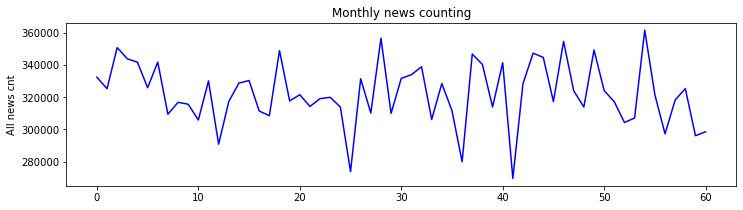

In [119]:
plt.figure(figsize = (12,3))
plt.plot( news_cnt_df['cnt'], color="blue", label = 'news')
plt.title("Monthly news counting")
plt.ylabel("All news cnt")

plt.show()

2015년 9월부터 현재까지 빅카인즈에서 제공하는 수록기사현황을 활용해서, 미디어뉴스의 행태를 살펴보았으나
생각과는 다르게 오히려 최근의 수록기사가 더 적었다. 


구글에서 2008년부터 포털 데이터를 가져오려고했을 때는, 뉴스 소비행태의 변화를 살피려고했으나 2015년부터 포털트렌드를 활용하는 현재로써는 굳이 가중치를 줄 필요가 없지않을까 한다.